# Sample code for exercise 3-2
2017 Aug. Tsuyoshi Okubo  
2018 Dec. modified by TO  
2020 Dec. modified by TO

In this code, you can perform iTEBD simulation of the ground state of spin model on 1d chain.  
$$\mathcal{H} = \sum_{i} J_z S_{i,z}S_{i+1,z} + J_{xy} (S_{i,x}S_{i+1,x} + S_{i,y}S_{i+1,y}) - h_x \sum_i S_{i,x} + D\sum_i S_{i,z}^2$$

This Hamiltonian can represent several situations. For example, when we set parameters,
* $J_z = -1$, $J_{xy} = 0$, $h_x \neq 0$, and $m = 2$ 

It represents the transverse field Ising chain.
If you set
* $J_z = J_{xy} = 1$, $h_x = 0$ 

It represents the $S=(m-1)/2$ Heisenberg model.

Because we consider an infinitely long chain, the boundary condition is expected to be irrelevant.


Note that, the accuracy of the calculation depends on chi_max, tau, and iteration steps.
tau is gradually decreases from tau_max to tau_min


You can change   

- (N: # of sites. In this case, our system is infinite)
- m: size of spin  (2S = 2m + 1)  
- Jz: amplitude of SzSz interaction  
- Jxy: amplitude of SxSx + SySy interaction  
- hx : amplitude of external field alogn x direction  
- D : Single ion anisotropy  
- (periodic: In this exercize, we only consider open boundary)
- chi_max : maximum bond dimension of MPS
- tau_max : maximum value of tau
- tau_min : minimum value of tau
- T_step : Total ITE steps
- output_dyn_num : output data step

In [1]:
import numpy as np
import scipy.linalg as linalg
import TEBD
import iTEBD
from matplotlib import pyplot

In [2]:
m = 3         ## m = 2S + 1, e.g. m=3 for S=1 
Jz = 1.0      ## Jz for SzSz interaction
Jxy = 1.0     ## Jxy for SxSx + SySy interaction
hx = 0.0      ## external field along x direction
D = 0.0       ## single ion anisotropy

chi_max = 20  ## maxmum bond dimension at truncation

tau_max = 0.1     ## start imaginary time tau
tau_min = 0.001   ## final imaginary time tau
T_step=2000       ## ITE steps
output_dyn_num = 100 ## output steps

In [3]:
print("2S = m - 1, infinite spin chain")
print("m = "+repr(m))
print("Hamiltonian parameters:")
print("Jz = "+repr(Jz))
print("Jxy = "+repr(Jxy))
print("hx = "+repr(hx))
print("D = "+repr(D))

print("chi_max = "+repr(chi_max))

print("tau_max = "+repr(tau_max))
print("tau_min = "+repr(tau_min))
print("T_step = "+repr(T_step))
print("output_dyn_num = "+repr(output_dyn_num))

2S = m - 1, infinite spin chain
m = 3
Hamiltonian parameters:
Jz = 1.0
Jxy = 1.0
hx = 0.0
D = 0.0
chi_max = 20
tau_max = 0.1
tau_min = 0.001
T_step = 2000
output_dyn_num = 100


In [4]:
##iTEBD simulation
Tn, lam, T_list,E_list,mz_list = iTEBD.iTEBD_Simulation(m,Jz,Jxy,hx,D,chi_max,tau_max,tau_min,T_step,output_dyn=True,output_dyn_num=output_dyn_num)

##Dyn 0.0 -1.0 1.0 array([ 1., -1.])
##Dyn 1.956898387873087 -1.3873538120758773 0.5497245746995861 array([ 0.54972457, -0.54972457])
##Dyn 3.8257218398891855 -1.3965302645373623 0.3109497220400429 array([ 0.31094972, -0.31094972])
##Dyn 5.610434381147543 -1.39888229683926 0.1642780010421263 array([ 0.164278, -0.164278])
##Dyn 7.314821626228748 -1.3996004181461414 0.08553485461393985 array([ 0.08553485, -0.08553485])
##Dyn 8.942498808990797 -1.3998908581345888 0.04527341063854815 array([ 0.04527341, -0.04527341])
##Dyn 10.49691845096481 -1.4000624067944427 0.02459997774872383 array([ 0.02459998, -0.02459998])
##Dyn 11.981377684616088 -1.4001941057199714 0.013763210795857572 array([ 0.01376321, -0.01376321])
##Dyn 13.399025247004122 -1.400307351155058 0.007941865230647138 array([ 0.00794187, -0.00794187])
##Dyn 14.752868158676053 -1.400408651975951 0.004736176682752201 array([ 0.00473618, -0.00473618])
##Dyn 16.045778101960416 -1.4005004592860977 0.002927769631841747 array([ 0.00292777,

##Dyn 42.61193795117866 -1.4014571733719796 0.0002664478779177066 array([ 0.00026645, -0.00026645])
##Dyn 42.650983207254136 -1.4014572839101873 0.0002664866500563832 array([ 0.00026649, -0.00026649])
##Dyn 42.688271137325515 -1.401457385923691 0.0002665236486969859 array([ 0.00026652, -0.00026652])
##Dyn 42.723880834091766 -1.4014574801084987 0.0002665589559740363 array([ 0.00026656, -0.00026656])
##Dyn 42.757887830494 -1.4014575671018092 0.00026659265010580937 array([ 0.00026659, -0.00026659])
##Dyn 42.79036425993101 -1.4014576474870775 0.00026662480567021763 array([ 0.00026662, -0.00026662])
##Dyn 42.82137900926379 -1.4014577217986444 0.00026665549368011136 array([ 0.00026666, -0.00026666])
##Dyn 42.85099786493391 -1.4014577905259502 0.00026668478193792635 array([ 0.00026668, -0.00026668])
##Dyn 42.879283652505315 -1.4014578541173974 0.0002667127349115042 array([ 0.00026671, -0.00026671])
##Dyn 42.906296369925776 -1.4014579129838654 0.00026673941415535833 array([ 0.00026674, -0.0002

In [5]:
## Calculate Energy
Env_left,Env_right = iTEBD.Calc_Environment_infinite(Tn,lam,canonical=False)
E_mps = iTEBD.Calc_Energy_infinite(Env_left,Env_right,Tn,lam,Jz,Jxy,hx,D)

print("iTEBD energy per bond = " + repr(E_mps))

iTEBD energy per bond = -1.401458185994012


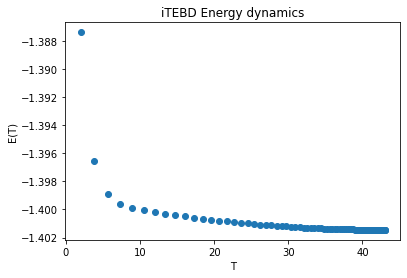

In [6]:
## plot energy dynamics
pyplot.title("iTEBD Energy dynamics")
pyplot.plot(T_list[1:],E_list[1:],"o")
pyplot.xlabel("T")
pyplot.ylabel("E(T)")
pyplot.show()
